# Experiments on Time series generation as ARIMA



In [1]:
# automatically reaload libraries (useful when working on libraries while playing with the notebook)
%load_ext autoreload
%autoreload 2

## ARMA models

In [2]:
# allow import from parent directory
import sys,os
sys.path.append(os.getcwd() + '/..')

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# import helper functions for dataset visualization
from ts_viz import plot_list_of_ts,plot_list_of_ts_over_subplots
# import helper functions to adjust list of series according to output of the clustering
from ts_utils import get_clustered_list

In [5]:
from generator import AR,MA,ARMA,ARIMA,SARIMA
from pynuTS.clustering import DTWKmeans

### Let's initialize the series with some random lists

In [7]:
np.random.seed(20)
random.seed(20)

x_buff = ARIMA(d=1,sigma=10).generate(100) # random walk 
e_buff = MA().generate(100) # white noise

### [Autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model)

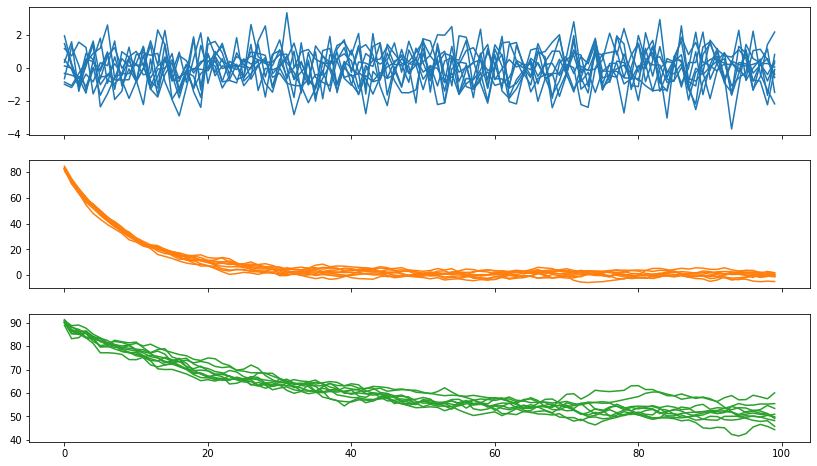

In [8]:
param_list = [{'c' : 0, 'pcoeff' : [], 'x_buff' : x_buff},
              {'c' : 0, 'pcoeff' : [1,-0.2,0.1], 'x_buff' : x_buff},
              {'c' : 2, 'pcoeff' : [1.06,-0.5,0.5,-0.1], 'x_buff' : x_buff}]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = AR(**params)
        list_of_series.append(pd.Series(ar.generate(n=100),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

#### pynuTS clusterization

In [9]:
clts = DTWKmeans(num_clust = 3, num_iter = 10, num_init=3, w=1,euclidean=True)
clts.fit(list_of_series)

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:13<00:09,  2.33s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


{0: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


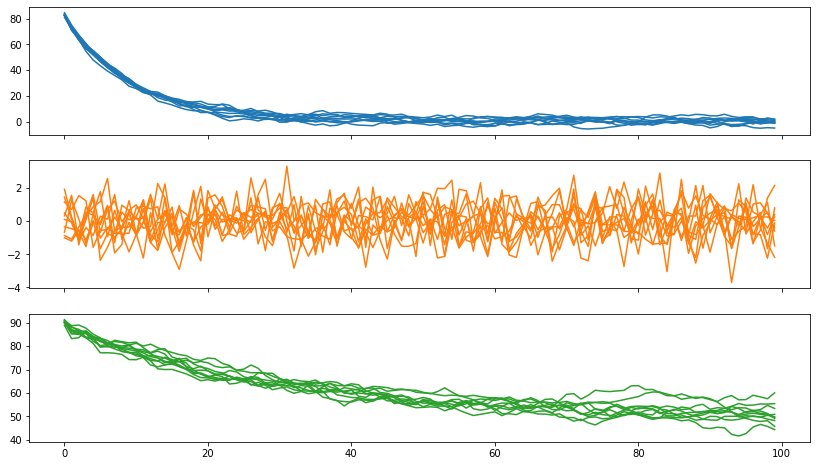

In [10]:
clustering_dict = clts.predict(list_of_series)
print(clustering_dict)
plot_list_of_ts_over_subplots(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))
#plot_list_of_ts(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))

## ARIMA models

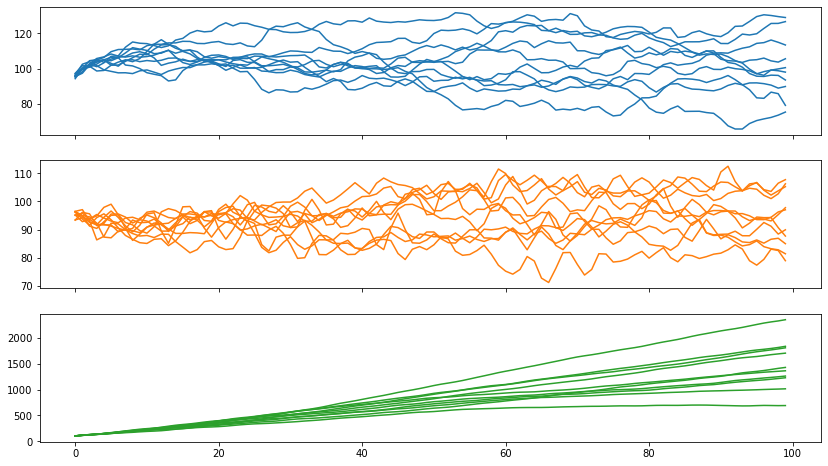

In [11]:
param_list = [{'c' : 0, 'pcoeff' : [0.5], 'qcoeff' : [1,1], 'd' : 1, 'x_buff' : x_buff, 'e_buff' : e_buff },
              {'c' : 0, 'pcoeff' : [0.5,-0.5], 'qcoeff' : [1,1], 'd' : 1, 'x_buff' : x_buff, 'e_buff' : e_buff },
              {'c' : 0, 'pcoeff' : [0.5,-0.5], 'qcoeff' : [1,1], 'd' : 2, 'x_buff' : x_buff, 'e_buff' : e_buff }]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = ARIMA(**params)
        list_of_series.append(pd.Series(ar.generate(n=100),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

#### pynuTS clusterization

In [12]:
clts = DTWKmeans(num_clust = 3, num_iter = 10, num_init=3, w=1,euclidean=True)
clts.fit(list_of_series)

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:13<00:08,  2.17s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2991.66it/s]


{0: [20, 23, 25, 26, 27, 29], 1: [21, 22, 24, 28], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


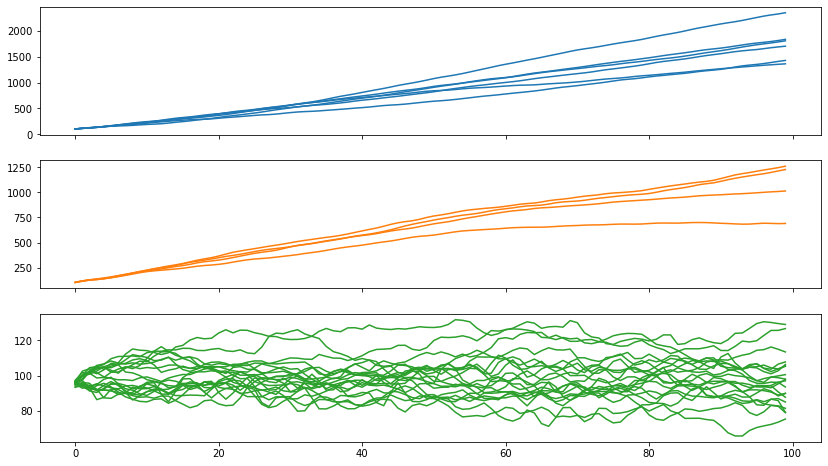

In [13]:
clustering_dict = clts.predict(list_of_series)
print(clustering_dict)
plot_list_of_ts_over_subplots(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))
#plot_list_of_ts(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))

## SARIMA models

### [Seasonal Auto-Regressive Integrated Moving-Average model](https://otexts.com/fpp2/seasonal-arima.html)


For clustering I will use __cosine similarity__ now instead of eucliedean distance

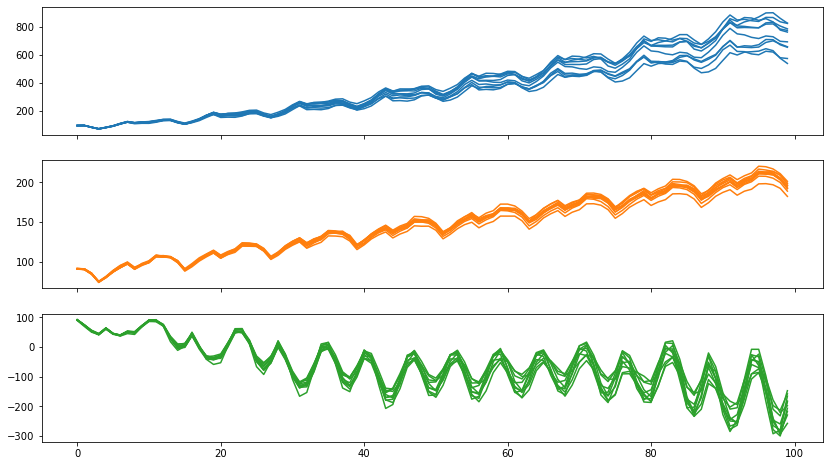

In [14]:
param_list = [{'pcoeff' : [0.6,0.1,0.2,-0.5],  'qcoeff' : [1.0,0.5,0.4,0.3],'d' : 1, 
               'Pcoeff' : [0.6,0.2,0.1,-0.05], 'Qcoeff' : [0.1], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
             {'pcoeff' : [0.6],  'qcoeff' : [0.5,0.4],'d' : 1, 
               'Pcoeff' : [-0.05], 'Qcoeff' : [0.5], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
             {'pcoeff' : [1,-1],  'qcoeff' : [],'d' : 1, 
               'Pcoeff' : [1,-1], 'Qcoeff' : [], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff }]
samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = SARIMA(**params)
        list_of_series.append(pd.Series(ar.generate(n=100),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

### Use Eucliedean distance

In [15]:
clts = DTWKmeans(num_clust = 3, num_iter = 10, num_init=5, w=1,euclidean=True)
clts.fit(list_of_series)

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:10<00:10,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


{0: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


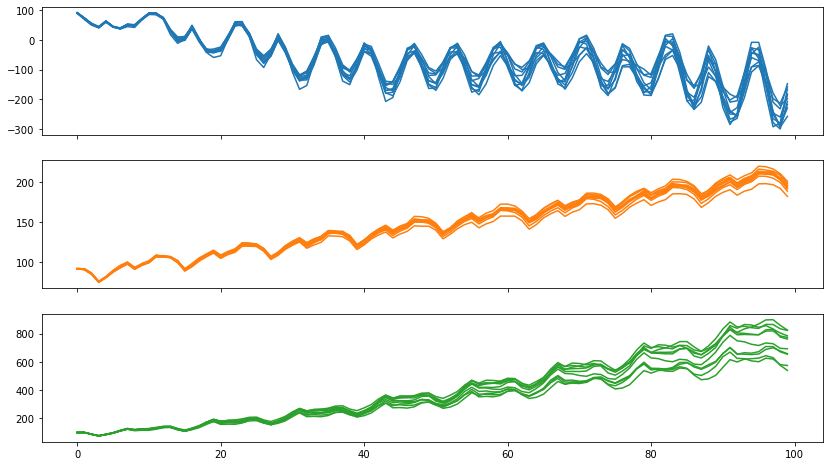

In [16]:
clustering_dict = clts.predict(list_of_series)
print(clustering_dict)
plot_list_of_ts_over_subplots(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))
#plot_list_of_ts(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))

### Use Cosine similarity

In [17]:
clts = DTWKmeans(num_clust = 3, num_iter = 10, num_init=5, w=1,euclidean=False)
clts.fit(list_of_series)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.72s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 1: [21, 22, 24, 28], 2: [20, 23, 25, 26, 27, 29]}


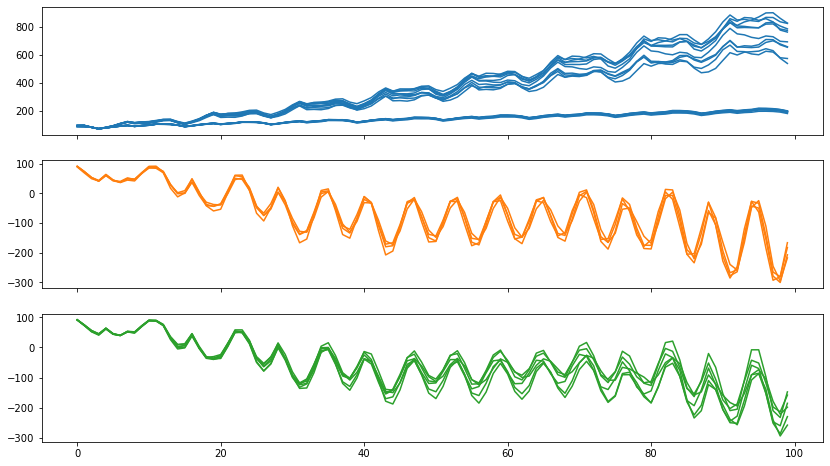

In [18]:
clustering_dict = clts.predict(list_of_series)
print(clustering_dict)
plot_list_of_ts_over_subplots(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))
#plot_list_of_ts(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))

### Let's play periods

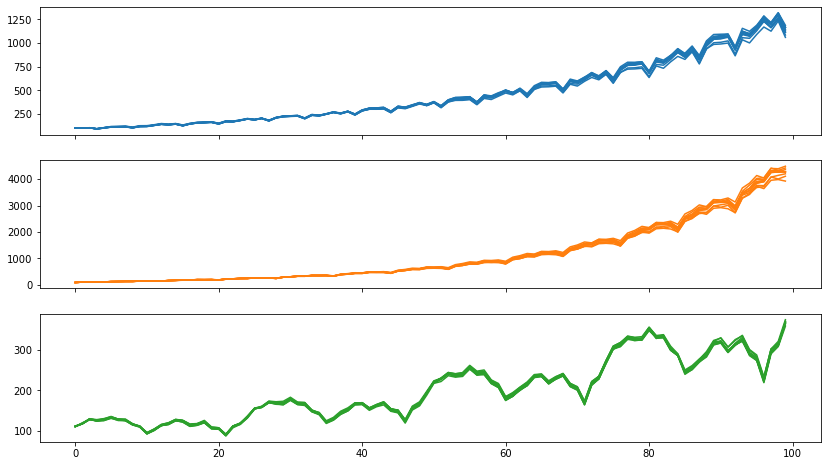

In [19]:
param_list = [ {'pcoeff' : [0.3,0.5,0.1],  'qcoeff' : [1,1,1,1],'d' : 0, 
               'Pcoeff' : [1,0.5], 'Qcoeff' : [1,1,1,1], 'D':0,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
             {'pcoeff' : [0.3,0.5,0.1],  'qcoeff' : [1,1,1,1],'d' : 0, 
               'Pcoeff' : [1,0.5], 'Qcoeff' : [1,1,1,1], 'D':0,'m' : 8,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
              {'pcoeff' : [0.3,0.5,0.1],  'qcoeff' : [1,1,1,1],'d' : 0, 
               'Pcoeff' : [1,0.5], 'Qcoeff' : [1,1,1,1], 'D':0,'m' : 25,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff }]


samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = SARIMA(**params)
        list_of_series.append(pd.Series(ar.generate(n=100),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

In [20]:
clts = DTWKmeans(num_clust = 3, num_iter = 10, num_init=5, w=1,euclidean=True)
clts.fit(list_of_series)

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:12<00:08,  2.05s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


{0: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 1: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


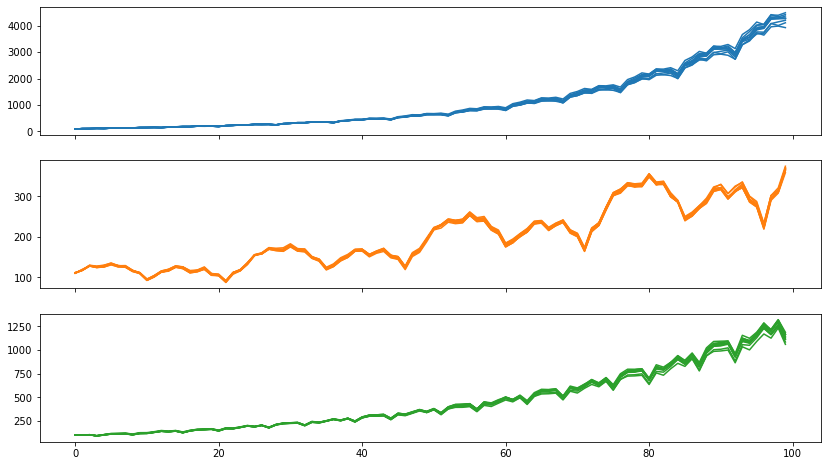

In [21]:
clustering_dict = clts.predict(list_of_series)
print(clustering_dict)
plot_list_of_ts_over_subplots(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))
#plot_list_of_ts(get_clustered_list(list_of_series,clustering_dict),figsize=(14,8))

### Credits

notebook by Marcello Morchio 2021

repository https://github.com/mallibus/pynuTS